In [22]:
import pickle
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
pickle_in = open("bloodcelldata.pickle","rb")
data = pickle.load(pickle_in)

pickle_in = open("bloodcelllabels.pickle","rb")
labels = pickle.load(pickle_in)

In [13]:
data = np.array(data)
labels = np.array(labels)

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.3)
test_data, val_data, test_labels, val_labels = train_test_split(test_data, test_labels, test_size = 0.5)


In [16]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_data.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_data.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_data.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 8710
Number of validation examples: 1867
Number of testing examples: 1867
Training images are of shape: (8710, 256, 256, 3)
Training labels are of shape: (8710,)
Validation images are of shape: (1867, 256, 256, 3)
Validation labels are of shape: (1867,)
Test images are of shape: (1867, 256, 256, 3)
Test labels are of shape: (1867,)


In [20]:
categories = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

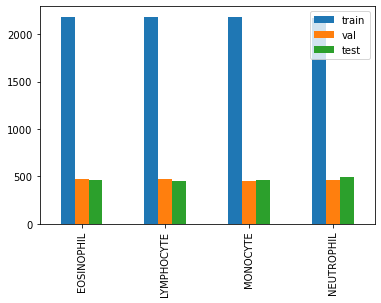

In [23]:
_, train_counts = np.unique(train_labels, return_counts = True)
_, val_counts = np.unique(val_labels, return_counts = True)
_, test_counts = np.unique(test_labels, return_counts = True)

pd.DataFrame({'train': train_counts, "val": val_counts, "test": test_counts}, index = categories).plot.bar()

plt.show()

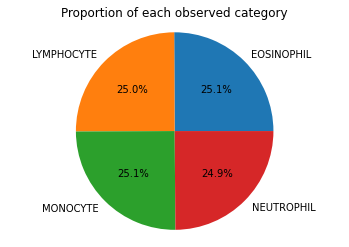

In [25]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0) , 
        labels=categories,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

8710


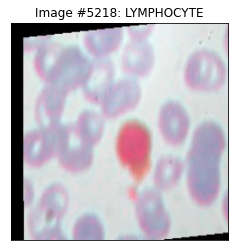

In [28]:
def display_random_image (categories, images, labels):
    print(len(images))
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{}: '.format(index) + categories[labels[index]])
    plt.show()
    
display_random_image (categories, train_data, train_labels)

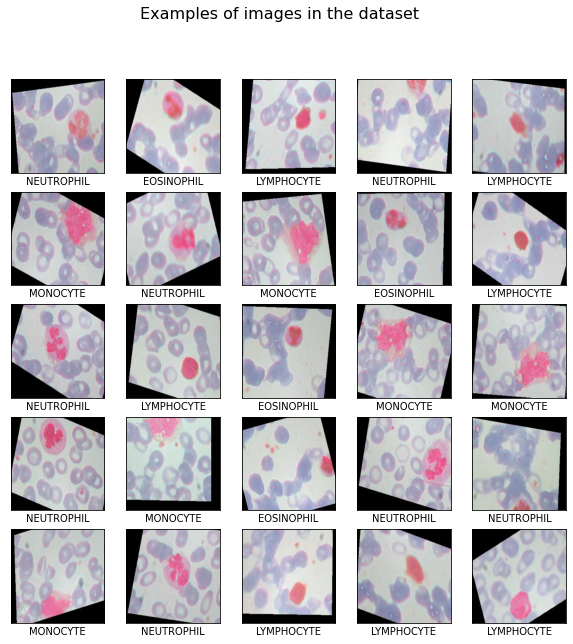

In [29]:
def display_examples(categories, images, labels):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle("Examples of images in the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(categories[labels[i]])
    plt.show()
    
display_examples(categories, train_data, train_labels)